In [3]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
import numpy as np
import matplotlib.pylab as pl

# print the JS visualization code to the notebook
shap.initjs()

In [4]:
X,y = shap.datasets.adult()
X_display,y_display = shap.datasets.adult(display=True)

In [10]:
# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
d_train = xgboost.DMatrix(X_train, label=y_train)
d_test = xgboost.DMatrix(X_test, label=y_test)

In [16]:
y_train

array([False,  True, False, ..., False,  True, False])

In [11]:
params = {
    "eta": 0.01,
    "objective": "binary:logistic",
    "subsample": 0.5,
    "base_score": np.mean(y_train),
    "eval_metric": "logloss"
}
model = xgboost.train(params, d_train, 5000, evals = [(d_test, "test")], verbose_eval=100, early_stopping_rounds=20)

[0]	test-logloss:0.546627
Will train until test-logloss hasn't improved in 20 rounds.
[100]	test-logloss:0.36373
[200]	test-logloss:0.317929
[300]	test-logloss:0.30061
[400]	test-logloss:0.292067
[500]	test-logloss:0.286776
[600]	test-logloss:0.283809
[700]	test-logloss:0.281807
[800]	test-logloss:0.280644
[900]	test-logloss:0.27992
[1000]	test-logloss:0.279281
Stopping. Best iteration:
[999]	test-logloss:0.279272



In [12]:
# this takes a minute or two since we are explaining over 30 thousand samples in a model with over a thousand trees
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [13]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_display.iloc[0,:])

In [14]:
shap.force_plot(explainer.expected_value, shap_values[:1000,:], X_display.iloc[:1000,:])

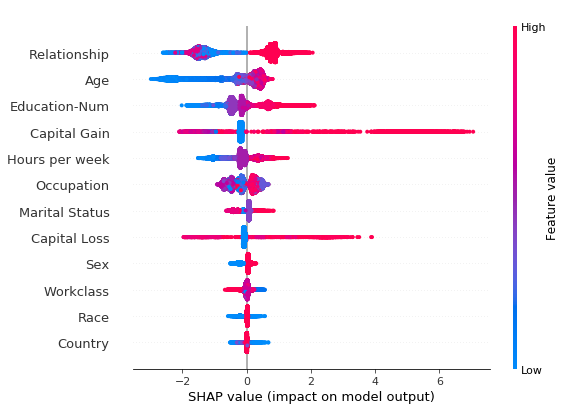

In [15]:
shap.summary_plot(shap_values, X)